# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


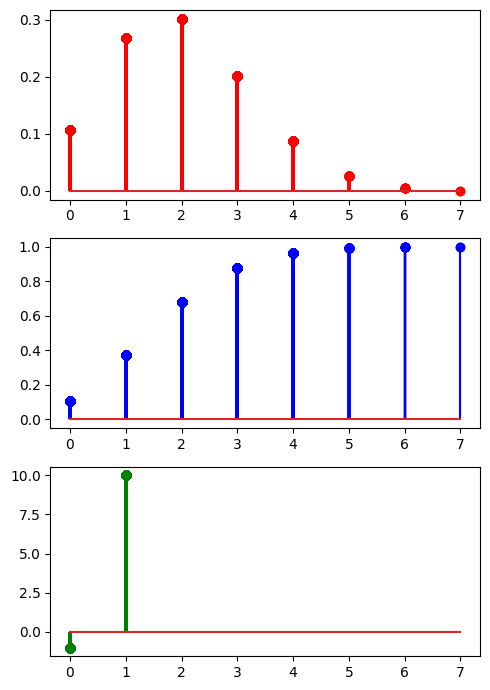

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [4]:
# TODO
from scipy.stats import norm
# Definir todas las funciones de probabilidad relacionadas con la distribución normal.
#norm.pdf()?
def dnorm(x, mean=0, sd=1):
    """
    Calcula la densidad de la distribución normal (estimación puntual).
    """
    result = norm.pdf(x, loc=mean, scale=sd)
    return result

def pnorm(q, mean=0, sd=1):
    """
    Calcula el acumulado de la distribución normal (CDF).
    """
    result = norm.cdf(q, loc=mean, scale=sd)
    return result

def qnorm(p, mean=0, sd=1):
    """
    Calcula el cuantil a partir de la distribución normal.
    """
    result = norm.ppf(p, loc=mean, scale=sd)
    return result

def rnorm(n, mean=0, sd=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result


In [5]:
from scipy.stats import norm
import numpy as np

# Definimos la media y desviación estándar
mu = 0    # media
sigma = 1  # desviación estándar

# 1. Calcular la probabilidad de que la Normal(mu=0, sigma=1) tome el valor 2
print(f"Probability density of Normal(0, 1) at value 2: {norm.pdf(2, loc=mu, scale=sigma)}")

# 2. Calcular la probabilidad acumulada de que la Normal(0, 1) tome un valor menor o igual a 2
print(f"Probability that Normal(0, 1) will take a value less than 2: {norm.cdf(2, loc=mu, scale=sigma)}")

# 3. Encontrar el valor de Normal(0, 1) que tiene una probabilidad acumulada de 0.9
print(f"Which value of Normal(0, 1) has a cumulative probability of 0.9? {norm.ppf(0.9, loc=mu, scale=sigma)}")

# 4. Generar 2000 valores aleatorios de una distribución Normal(0, 1)
np.random.seed(42)
print(f"Generate 2000 random values from a Normal(0, 1) distribution: {norm.rvs(loc=mu, scale=sigma, size=2000)}")


Probability density of Normal(0, 1) at value 2: 0.05399096651318806
Probability that Normal(0, 1) will take a value less than 2: 0.9772498680518208
Which value of Normal(0, 1) has a cumulative probability of 0.9? 1.2815515655446004
Generate 2000 random values from a Normal(0, 1) distribution: [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


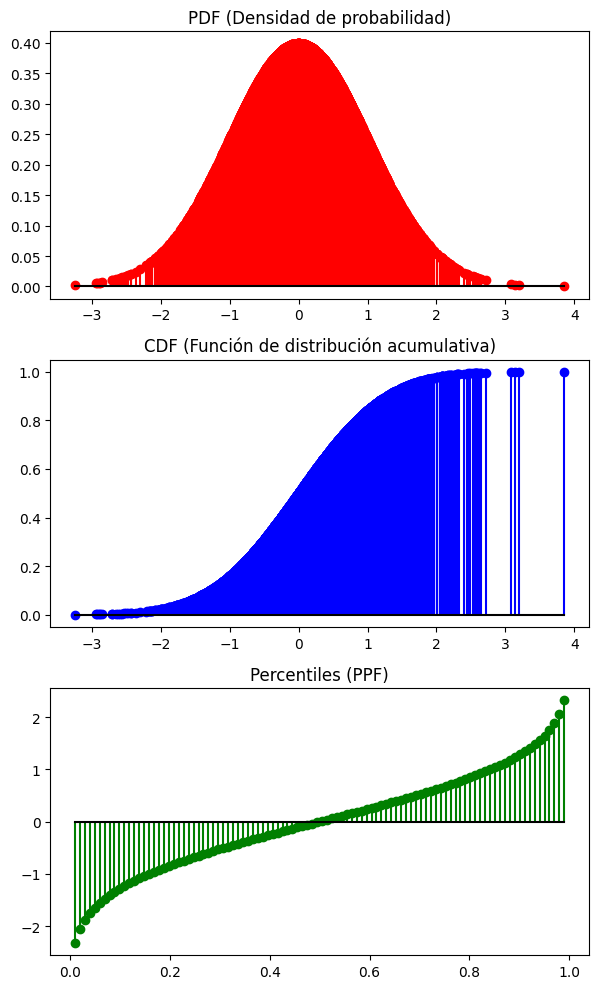

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(42)
mu = 0    
sigma = 1  
data = norm.rvs(loc=mu, scale=sigma, size=2000)

# Calcular PDF, CDF y percentiles (valores cuantiles) de los datos
pdf = norm.pdf(data, loc=mu, scale=sigma)
cdf = norm.cdf(data, loc=mu, scale=sigma)

# Para los percentiles, tomaremos un conjunto de probabilidades y obtendremos los valores cuántiles
percentiles = np.linspace(0.01, 0.99, 100)
ppf = norm.ppf(percentiles, loc=mu, scale=sigma)

# Configurar el gráfico
fig, axis = plt.subplots(3, 1, figsize=(6, 10))

# Gráfico de PDF
axis[0].stem(data, pdf, "r-", markerfmt="ro", basefmt="k-")
axis[0].set_title("PDF (Densidad de probabilidad)")

# Gráfico de CDF
axis[1].stem(data, cdf, "b-", markerfmt="bo", basefmt="k-")
axis[1].set_title("CDF (Función de distribución acumulativa)")

# Gráfico de Percentiles (PPF)
axis[2].stem(percentiles, ppf, "g-", markerfmt="go", basefmt="k-")
axis[2].set_title("Percentiles (PPF)")

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


Distribucion uniforme

In [7]:
from scipy.stats import uniform

# Definir todas las funciones de probabilidad relacionadas con la distribución uniforme.

def dunif(x, low=0, high=1):
    """
    Calcula la densidad de la distribución uniforme (estimación puntual).
    """
    result = uniform.pdf(x, loc=low, scale=high - low)
    return result

def punif(q, low=0, high=1):
    """
    Calcula el acumulado de la distribución uniforme (CDF).
    """
    result = uniform.cdf(q, loc=low, scale=high - low)
    return result

def qunif(p, low=0, high=1):
    """
    Calcula el cuantil a partir de la distribución uniforme.
    """
    result = uniform.ppf(p, loc=low, scale=high - low)
    return result

def runif(n, low=0, high=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc=low, scale=high - low, size=n)
    return result


In [8]:
import numpy as np

# Definir el rango de la distribución uniforme
low = 0    # límite inferior
high = 1   # límite superior

# 1. Calcular la probabilidad de densidad (aunque en uniforme es constante en su rango)
print(f"Probability density of Uniform(0, 1) at value 0.5: {uniform.pdf(0.5, loc=low, scale=high - low)}")

# 2. Calcular la probabilidad acumulada de que la Uniform(0, 1) tome un valor menor o igual a 0.5
print(f"Probability that Uniform(0, 1) will take a value less than 0.5: {uniform.cdf(0.5, loc=low, scale=high - low)}")

# 3. Encontrar el valor de Uniform(0, 1) que tiene una probabilidad acumulada de 0.9
print(f"Which value of Uniform(0, 1) has a cumulative probability of 0.9? {uniform.ppf(0.9, loc=low, scale=high - low)}")

# 4. Generar 2000 valores aleatorios de una distribución Uniform(0, 1)
np.random.seed(42)
print(f"Generate 2000 random values from a Uniform(0, 1) distribution: {uniform.rvs(loc=low, scale=high - low, size=2000)}")


Probability density of Uniform(0, 1) at value 0.5: 1.0
Probability that Uniform(0, 1) will take a value less than 0.5: 0.5
Which value of Uniform(0, 1) has a cumulative probability of 0.9? 0.9
Generate 2000 random values from a Uniform(0, 1) distribution: [0.37454012 0.95071431 0.73199394 ... 0.06895802 0.05705472 0.28218707]


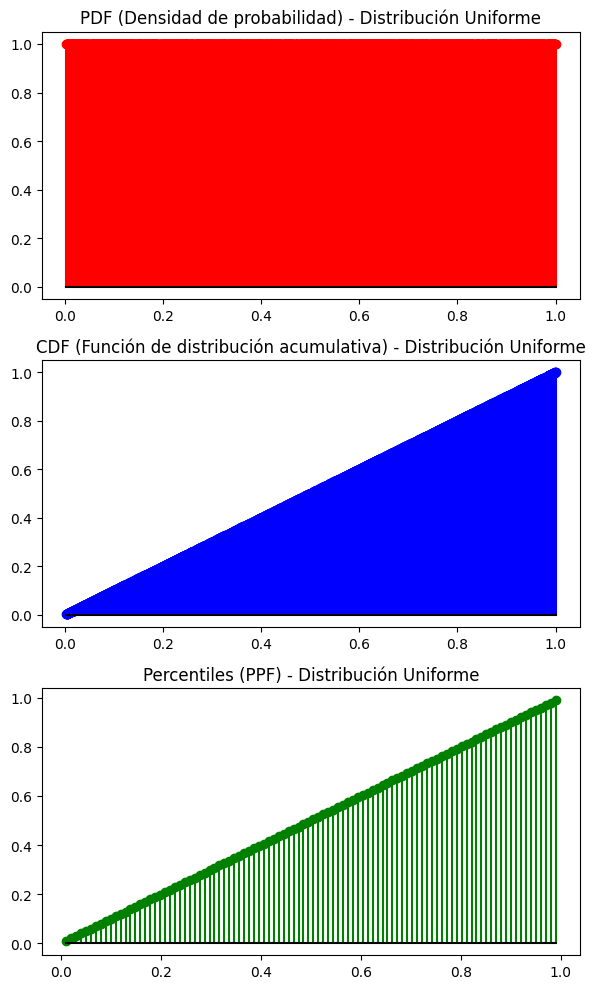

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Fijar semilla para reproducibilidad y definir límites de la distribución uniforme
np.random.seed(42)
low = 0     # límite inferior
high = 1    # límite superior
data = uniform.rvs(loc=low, scale=high - low, size=2000)

# Calcular PDF, CDF y percentiles (valores cuantiles) de los datos
pdf = uniform.pdf(data, loc=low, scale=high - low)
cdf = uniform.cdf(data, loc=low, scale=high - low)

# Para los percentiles, tomaremos un conjunto de probabilidades y obtendremos los valores cuántiles
percentiles = np.linspace(0.01, 0.99, 100)
ppf = uniform.ppf(percentiles, loc=low, scale=high - low)

# Configurar el gráfico
fig, axis = plt.subplots(3, 1, figsize=(6, 10))

# Gráfico de PDF
axis[0].stem(data, pdf, "r-", markerfmt="ro", basefmt="k-")
axis[0].set_title("PDF (Densidad de probabilidad) - Distribución Uniforme")

# Gráfico de CDF
axis[1].stem(data, cdf, "b-", markerfmt="bo", basefmt="k-")
axis[1].set_title("CDF (Función de distribución acumulativa) - Distribución Uniforme")

# Gráfico de Percentiles (PPF)
axis[2].stem(percentiles, ppf, "g-", markerfmt="go", basefmt="k-")
axis[2].set_title("Percentiles (PPF) - Distribución Uniforme")

plt.tight_layout()
plt.show()
